## Assignment 1

Consider the sliding-tile puzzle pictured below. There are three black tiles, a blank space (empty location), and three yellow tiles, arranged randomly in the initial configuration given below:

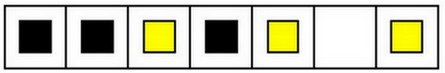

There are three legal moves:
1. (simple move) any tile can move into an adjacent empty location,
2. (jump move) any tile can jump over exactly one tile and land in the empty location, and
3. (jump move) any tile can jump over exactly two tiles and land in the empty location.

The goal is to move all the yellow tiles to the left of all the black tiles as follows:

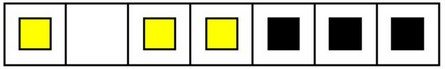

Note that the final configuration is not unique as the blank space can be in 7 different locations and in each case the yellow and black tiles satisfy the goal conditions.

The objective is to solve the sliding-tile puzzle using various search strategies. That is, find a sequence of legal moves that takes a given "initial" configuration (start) to the specified "final" one (goal) state.

You will have to complete the code cells below. More explanations and comments need to be provided there.  

Note that in case a solution does **not** exist for some *start* and *goal* state pairs, your program will report it.

The first search strategy to be considered is Iterative Deepening Search (IDS).

Here are the required components for solving the sliding-tile puzzle using IDS:
1. State Representation: There will be a list of 6 tiles plus a blank space, with 2 colors for the tiles.
2. Goal Check: This function checks if the current state is the final state.
3. Legal Moves: The legal moves will need to be defined along with their costs.
4. Depth-Limited Search: This is a helper function to perform depth-limited search at each depth level.
5. Iterative Deepening Search (ID): Main function to perform the search which will keep calling the depth-limited search function until a solution has been found.

For IDS, we assume that the cost of any move is 1, including the jump moves over one or two tiles. In this way, IDS will find **the shortest path where the path length represents the total number of moves** to get to the final state.    

In [1]:
# the code for the goal state check function and the generation of all possible successors states
# from the current state determined by the valid moves; there is also a helper function.

# Define the goal state check function
def check_goal(state):
    # The goal is to have all 'Y' tiles on the left of all 'B' tiles
    return state.find('B') >= state.rfind('Y')

# Generate all possible successors from the current state
def generate_successors(state):
    successors = []
    blank_index = state.index('_')

    # Move to adjacent positions
    if blank_index > 0:
        successors.append(swap(state, blank_index, blank_index - 1))
    if blank_index < 6:
        successors.append(swap(state, blank_index, blank_index + 1))

    # Jump over one tile
    if blank_index > 1:
        successors.append(swap(state, blank_index, blank_index - 2))
    if blank_index < 5:
        successors.append(swap(state, blank_index, blank_index + 2))

    # Jump over two tiles
    if blank_index > 2:
        successors.append(swap(state, blank_index, blank_index - 3))
    if blank_index < 4:
        successors.append(swap(state, blank_index, blank_index + 3))

    return successors

# Helper function to swap elements in the state
def swap(state, i, j):
    new_state = list(state)
    new_state[i], new_state[j] = new_state[j], new_state[i]
    return ''.join(new_state)

The following function implements depth-limited search using recursion. It will construct a path to the goal node while traversing the search tree up to the specified depth limit.

In particular, it takes in a state, a path and a depth level, and if the goal state has been found, it returns the path from the start state to the goal state.

In [2]:
#Perform Depth-Limited Search (DLS)
def dls(state, depth_limit, path):
    if check_goal(state):
        return path
    if depth_limit == 0:
        return None

    for successor in generate_successors(state):
        if successor not in path:  # Avoid cycles
            result = dls(successor, depth_limit - 1, path + [successor])
            if result:
                return result

    return None

The following function implements Iterative Deepening Search (IDS) using depth-limited search.

In particular, the ids function iteratively increases the depth limit and calls depth-limited seach function dls until the goal state has been reached. In particular, it takes in an initial state, and if the goal state has been found at some depth level by depth-limited search, it returns the found path from the start state to the goal state.


In [3]:
# Perform Iterative Deepening Search (IDS)
def ids(initial_state):
    depth = 0
    while True:
        result = dls(initial_state, depth, [initial_state])
        if result:
            return result
        depth += 1


Here is an example usage of the ids function:

In [4]:
## Initial state example: 3 tiles per colour, 2 colours
initial_state = 'BYBY_YB'

print("Initial state:", initial_state)

# Solve the puzzle
solution_path = ids(initial_state)

# Print the solution path
if solution_path:
    print("Solution found!")
    for step in solution_path:
        print(step)
else:
    print("No solution found.")

Initial state: BYBY_YB
Solution found!
BYBY_YB
BY_YBYB
BYY_BYB
_YYBBYB
YY_BBYB
YYYBB_B


### Task 1

Your first task is to modify the program given above for solving a more general version of the sliding-tile puzzle: there will be <b>n > 0 tiles for each colour</b> plus a space, with any two colors for the tiles. In the example state given below, there are 4 black tiles, and 4 yellow tiles, and a blank space (empty location), arranged randomly in the initial configuration given below:

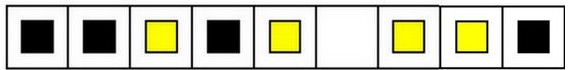

The goal is to move all the yellow tiles to the left of all the black tiles as follows:

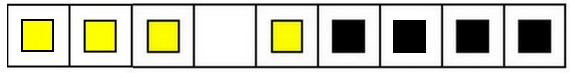

Note that the final configuration is not unique as the blank space can be in 9 different locations and in each case the yellow and black tiles satisfy the goal conditions.

You will need to revise the state representation, the goal check, and the moves accordingly.
1. State Representation will have a list of <b>n > 0 tiles for each colour</b> plus a blank space, with any two given colors for the tiles.
2. Tile Colur Ordering: This is given in a list of the first and the second colours.
3. Goal Check: All the tiles of the first color will be to the left of all the tiles of the second color. As before, the blank space can be located anywhere.
4. Legal Moves: These are the same as before, a tile can be moved to an adjacent blank location, it can jump over one tile, or jump over two tiles.

Your revised Iterative Deepening Search program will print the sequence of states starting form the initial state to a goal state, along with the total number of nodes visited (explored),  the total number of nodes generated and the total runtime.

You need to provide the code where you see <b>pass</b> and add any other helper function / code you will need for your program.

In [5]:
# modified code for the goal state check function and the generation of all possible successors states
# from the current state determined by the valid moves; add any helper functions you may need for this part

from __future__ import annotations
import random
import time
import heapq
from collections import deque
from typing import List, Tuple, Dict, Optional

def is_goal(state, n, colors):
    # The goal is to have all tiles of the first color on the left, 
    # followed by all tiles of the second color, regardles of where blank space is
    c1, c2 = colors[0], colors[1]
# Find the last index of c1 and first index of c2; in goal we require last(c1) < first(c2)
    try:
        last_c1 = state.rfind(c1)
        first_c2 = state.find(c2)
        if last_c1 == -1 or first_c2 == -1:
            return False
        return last_c1 < first_c2
    except ValueError:
        return False
    
# Generate all possible successors from the current state
def generate_successors(state):
    succ: List[str] = []
    b = state.index('_')
    L = len(state)
    for d in (1, 2, 3):
        if b - d >= 0:
            succ.append(swap(state, b, b - d))
        if b + d < L:
            succ.append(swap(state, b, b + d))
    return succ


# Helper function to swap elements in the state
def swap(state, i, j):
    s = list(state)
    s[i], s[j] = s[j], s[i]
    return "".join(s)


In [6]:
# Implementations of Depth-Limited Search (DLS) and Iterative Deepening Search (IDS) with metrics

# Perform Depth-Limited Search (DLS) with metrics
def dls(state, depth_limit, path, n, colors, stats):
    stats['max_depth'] = max(stats.get('max_depth', 0), len(path) - 1)
    if is_goal(state, n, colors):
        return path
    if depth_limit == 0:
        return None


    stats['expands'] = stats.get('expands', 0) + 1
    for succ in generate_successors(state):
        stats['generated'] = stats.get('generated', 0) + 1
        if succ in path: # simple cycle check
            continue
        res = dls(succ, depth_limit - 1, path + [succ], n, colors, stats)
        if res is not None:
            return res
    return None

# Perform Iterative Deepening Search (IDS) with metrics
def ids(initial_state, n, colors):
    start = time.perf_counter()
    depth = 0
    stats: Dict[str, int | float] = {'expands': 0, 'generated': 0, 'max_depth': 0}
    while True:
        # Use a fresh stats snapshot per depth but accumulate top-level counters
        local_stats = {'expands': 0, 'generated': 0, 'max_depth': 0}
        result = dls(initial_state, depth, [initial_state], n, colors, local_stats)
        # accumulate
        stats['expands'] += local_stats['expands']
        stats['generated'] += local_stats['generated']
        stats['max_depth'] = max(stats['max_depth'], local_stats['max_depth'])
        if result is not None:
            stats['time_sec'] = round(time.perf_counter() - start, 6)
            stats['solution_depth'] = len(result) - 1
            return result, stats
        depth += 1


Test your program with several initial configurations (either generated randomly, or directly assigned):

In [7]:
# Test cases - at least three

# This function populates the tile list with n tiles of each color randomly
def create_random_initial_state(n, colors):
    tiles = [colors[0]] * n + [colors[1]] * n + ['_']
    random.shuffle(tiles)
    return "".join(tiles)


# This function prints the solution path and metrics
def print_solution(solution_path, stats):
    if solution_path:
        print("Solution found!")
        for i, step in enumerate(solution_path):
            print(f"Step {i}: {step}")
    else:
        print("No solution found.")
    if stats:
        # normalise keys
        explored = stats.get('expands', 0)
        generated = stats.get('generated', 0)
        sol_depth = stats.get('solution_depth', (len(solution_path) - 1) if solution_path else 0)
        t = stats.get('time_sec', 0.0)
        print(f"Number of states explored: {explored}")
        print(f"Number of states generated: {generated}")
        print(f"Optimal path length: {sol_depth}")
        print(f"Time taken: {t:.12f} seconds")

In [8]:
# Example with n = 4 and two colors
n = 4
colors = ['Y', 'B']  # Representing two random colours

initial_state = create_random_initial_state(n, colors)
print("Initial state:", initial_state)

solution_path, metrics = ids(initial_state, n, colors)


# Print the solution path and metrics
print_solution(solution_path, metrics)

Initial state: YB_BYYBBY
Solution found!
Step 0: YB_BYYBBY
Step 1: Y_BBYYBBY
Step 2: YYBB_YBBY
Step 3: YYBBY_BBY
Step 4: YYBBYYBB_
Step 5: YYBBYY_BB
Step 6: YYB_YYBBB
Step 7: YYBYY_BBB
Step 8: YY_YYBBBB
Number of states explored: 8956
Number of states generated: 43507
Optimal path length: 8
Time taken: 0.080071000000 seconds


**The sample output with n = 4 and two colors:**

### Task 2

In the following you will implement **A\* algorithm** to find a solution to the sliding-tile puzzle as defined in **Task 1**. The A* algorithm uses a priority queue (the frontier) to explore states in the order of their estimated total cost (f_value), which is the sum of the actual cost to reach the state (g_value) and the heuristic estimate (h_value). You may choose **any admissible heuristic function** you think would be suitable for the sliding-tile puzzle problem.

For Informed Search methods such as A* algorithm and Beam Search descibed below, we assume that the cost of a simple move is 1, and the cost of a jump move is the number of tiles jumped over plus 1. In this way, the A* algorithm will find **the optimal path which minimizes the total cost along any given path**.

For the implementation of the priority queue, you should try using the functions from the module **heapq** (see <a href="https://docs.python.org/3/library/heapq.html"> "See Python Documentation for **heapq**" </a>).

Further details are given below:

1. The *heap* data structure is usually used to implement priority queues (PQ). Recall that in a PQ each item has a priority. The item with smallest value gets the highest priority.
2. An item in the queue is a tuple. The first is the estimated distance to the goal given by the chosen heuristic. This determines the priority. The second member of the tuple is the state.
3. You will need the function *heappop* to extract the item with highest priority (lowest distance).
4. Use the function *heappush* to put an item into the queue.

Your A* Search program will print the sequence of states starting form the initial state to a goal state, along with the total number of nodes visited (explored), the total number of nodes generated and the total runtime.

You need to provide the code where you see <b>pass</b> and add any other helper function / code you will need for your program.

The sample output with n = 4 and two colors:

In [9]:
# the code for the goal state check function and the generation of all possible successors states
# from the current state determined by the valid moves; add any helper functions you may need for this part

import random
import heapq
import time

# Define the goal state check function
def is_goal(state, n, colors):
    # The goal is to have all tiles of the first color on the left, 
    # followed by all tiles of the second color, regardles of where blank space is
    first, second = colors[0], colors[1]
    seen_second = False
    for ch in state:
        if ch == second:
            seen_second = True
        elif ch == first and seen_second:
            # Found a first-colour tile after seeing a second-colour tile -> not goal
            return False
        # ignore blanks and any other chars
    return True
    
# Helper function: swap characters at positions i and j
def swap(state, i, j):
    s = list(state)
    s[i], s[j] = s[j], s[i]
    return "".join(s)

# Generate all possible successors of a state
def generate_successors(state):
    succ = []
    b = state.index('_')
    L = len(state)
    for d in (1, 2, 3):  # blank can move 1, 2, or 3 steps
        if b - d >= 0:
            succ.append(swap(state, b, b - d))
        if b + d < L:
            succ.append(swap(state, b, b + d))
    return succ



In [10]:
import heapq
import time

# Heuristic: number of (second-colour-before-first-colour) inversions.
# Admissible under your costs: each unit of movement fixes at most one inversion,
# and moving the blank by k cells costs exactly k.
def heuristic(state, n, colors):
    first, second = colors[0], colors[1]
    count_first = 0
    inversions = 0
    # Scan from right to left: every SECOND we see counts all FIRSTs to its right
    for ch in reversed(state):
        if ch == first:
            count_first += 1
        elif ch == second:
            inversions += count_first
        # blanks are ignored
    return inversions

def reconstruct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path

def a_star_search(initial_state, n, colors):
    start_time = time.perf_counter()
    stats = {'expands': 0, 'generated': 0}

    # Min-heap of (f, tie, state)
    open_heap = []
    g = {initial_state: 0}
    came_from = {}
    tie = 0

    h0 = heuristic(initial_state, n, colors)
    heapq.heappush(open_heap, (h0, tie, initial_state))
    closed = set()

    while open_heap:
        f, _, current = heapq.heappop(open_heap)
        if current in closed:
            continue
        closed.add(current)
        stats['expands'] += 1

        if is_goal(current, n, colors):
            path = reconstruct_path(came_from, current)
            stats['solution_depth'] = len(path) - 1
            stats['time_sec'] = round(time.perf_counter() - start_time, 6)
            return path, stats

        # Expand successors
        b_cur = current.index('_')
        for succ in generate_successors(current):
            b_next = succ.index('_')
            step_cost = abs(b_next - b_cur)  # 1, 2, or 3 based on jump size
            tentative_g = g[current] + step_cost

            if succ in closed and tentative_g >= g.get(succ, float('inf')):
                continue

            if tentative_g < g.get(succ, float('inf')):
                came_from[succ] = current
                g[succ] = tentative_g
                tie += 1
                f_succ = tentative_g + heuristic(succ, n, colors)
                heapq.heappush(open_heap, (f_succ, tie, succ))
                stats['generated'] += 1

    # No solution (shouldn't happen for valid instances)
    stats['time_sec'] = round(time.perf_counter() - start_time, 6)
    return None, stats



Test your program with several initial configurations (either generated randomly, or directly assigned):

In [11]:
import random

# Create a random initial state with n tiles of each color + one blank
def create_random_initial_state(n, colors):
    tiles = [colors[0]] * n + [colors[1]] * n + ['_']
    random.shuffle(tiles)
    return "".join(tiles)

# Print the solution path and metrics
def print_solution(solution_path, stats):
    if solution_path:
        print("Solution found!")
        for i, step in enumerate(solution_path):
            print(f"Step {i}: {step}")
    else:
        print("No solution found.")

    explored = stats.get('expands', stats.get('explored', 0))
    generated = stats.get('generated', 0)
    t = stats.get('time_sec', stats.get('time', 0.0))
    print(f"Number of states explored: {explored}")
    print(f"Number of states generated: {generated}")
    print(f"Time taken: {t} seconds")


In [12]:
# Example with n = 3 and two colors
n = 3
colors = ['A', 'B']

# Create a random initial state with n tiles of each color
initial_state = create_random_initial_state(n, colors)
print("Initial state:", initial_state)

# Solve the puzzle and get metrics (A* for Task 2)
solution_path, metrics = a_star_search(initial_state, n, colors)

# Print the solution path and metrics
print_solution(solution_path, metrics)


Initial state: BAA_BAB
Solution found!
Step 0: BAA_BAB
Step 1: _AABBAB
Step 2: AA_BBAB
Step 3: AAABB_B
Number of states explored: 22
Number of states generated: 41
Time taken: 0.000315 seconds


**The sample output with n = 4 and two colors:**

### Task 3

Beam Search is a heuristic search algorithm that explores a graph by expanding the most promising nodes in a limited way. It's a variation of Best-First Search that uses a heuristic function, but unlike A*, it doesn't guarantee optimality or completeness. Instead of keeping all the promising nodes in a priority queue (the frontier), it only keeps a fixed number, or "beam," of the best nodes at each level of the search tree. This makes it much more memory-efficient than A* at the cost of potential sub-optimality.

In the following diagram, the beam width is 2 which means at any level, only two most promising nodes determined by the lowest heuristic f-scores will be inserted to the frontier. Black nodes represent the explored nodes, grey nodes are currently in the frontier, and white nodes in the rectangles have been generated and considered for insertion into the frontier (for which f-scores have been calculated); the rest of the white nodes will never be generated or considered.  

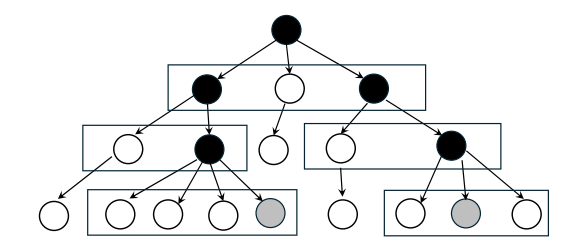

To implement Beam Search, we will need to adapt the core logic of a breadth-first search (BFS). The main difference is that instead of exploring all nodes at a given depth like in BFS, you only keep the k most promising ones, where k is the given beam width. If k is equal to the branching factor of the search tree, we will be doing BFS.

For Informed Search methods such as the Beam Search descibed above, we assume that the cost of a simple move is 1, however, the cost of a jump move is the number of times jumped over plus 1. Note that the Beam Search method is an anytime algorithm and it does not guarantee optimality nor completeness.

Your Beam Search program will print the sequence of states starting form the initial state to a goal state, along with the total number of nodes visited (explored), the total number of nodes generated and the total runtime.

You need to provide the code where you see <b>pass</b> and add any other helper function / code you will need for your program.

In [13]:
import time
from heapq import nlargest  # for efficient top-k selection by score

# Heuristic: number of (second-colour-before-first-colour) inversions (admissible)
def heuristic(state, n, colors):
    first, second = colors[0], colors[1]
    count_first = 0
    inversions = 0
    for ch in reversed(state):
        if ch == first:
            count_first += 1
        elif ch == second:
            inversions += count_first
    return inversions

def reconstruct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path

def beam_search(initial_state, beam_width, n, colors):
    """
    Beam Search (anytime, not guaranteed optimal or complete).
    Keeps the top-k nodes by lowest f = g + h at each "layer".
    Costs: move=1, jump 1->2, jump 2->3.
    """
    start_time = time.perf_counter()
    stats = {'expands': 0, 'generated': 0}

    # g-costs and backpointers
    g = {initial_state: 0}
    came_from = {}

    # frontier holds (f, state); start with the initial state
    frontier = [(heuristic(initial_state, n, colors), initial_state)]
    seen = {initial_state}

    # Early goal
    if is_goal(initial_state, n, colors):
        path = [initial_state]
        stats['solution_depth'] = 0
        stats['time_sec'] = round(time.perf_counter() - start_time, 6)
        return path, stats

    while frontier:
        # Expand the current beam as a "layer"
        candidates = []  # (f, state)
        next_seen = set()  # to moderate duplicates within the new layer

        for f_val, state in frontier:
            stats['expands'] += 1
            b_cur = state.index('_')

            for succ in generate_successors(state):
                # step cost is blank movement distance (1,2,3)
                b_next = succ.index('_')
                step_cost = abs(b_next - b_cur)
                tentative_g = g[state] + step_cost

                # Only keep better paths (or first time seen)
                prev = g.get(succ)
                if prev is None or tentative_g < prev:
                    g[succ] = tentative_g
                    came_from[succ] = state

                    f_succ = tentative_g + heuristic(succ, n, colors)

                    # De-dup within this layer’s candidate set
                    if succ not in next_seen:
                        candidates.append((f_succ, succ))
                        next_seen.add(succ)
                        stats['generated'] += 1

                    # Goal check as soon as we generate/improve it
                    if is_goal(succ, n, colors):
                        path = reconstruct_path(came_from, succ)
                        stats['solution_depth'] = len(path) - 1
                        stats['time_sec'] = round(time.perf_counter() - start_time, 6)
                        return path, stats

        if not candidates:
            break

        # Keep only the top-k with smallest f
        # nlargest on negative f to avoid sorting the whole list; simple sort is fine too for clarity:
        candidates.sort(key=lambda x: x[0])             # ascending by f
        frontier = candidates[:max(1, beam_width)]      # next beam

        # Update global seen (not strictly required for beam, but helps avoid cycles across layers)
        for _, s in frontier:
            seen.add(s)

    # No goal found (beam can miss solutions)
    stats['time_sec'] = round(time.perf_counter() - start_time, 6)
    return None, stats


In [14]:
# Example with n = 4 and two colors
n = 4
colors = ['Y', 'B']  # any two symbols you like
beam_width = 3       # try 2, 3, 5... (larger = more memory, better results)

# Create a random initial state with n tiles of each color
initial_state = create_random_initial_state(n, colors)
# initial_state = "_YBYBBBYY"  # ← use this to test a fixed case instead
print("Initial state:", initial_state)

# Solve the puzzle using Beam Search and get metrics
solution_path, metrics = beam_search(initial_state, beam_width, n, colors)

# Print the solution path and metrics
print_solution(solution_path, metrics)


Initial state: B_YYBYYBB
Solution found!
Step 0: B_YYBYYBB
Step 1: _BYYBYYBB
Step 2: YB_YBYYBB
Step 3: YBYYB_YBB
Step 4: YBYY_BYBB
Step 5: YBYYYB_BB
Step 6: YBYYY_BBB
Step 7: YBYY_YBBB
Step 8: Y_YYBYBBB
Step 9: YY_YBYBBB
Step 10: YYYYB_BBB
Number of states explored: 28
Number of states generated: 67
Time taken: 0.000319 seconds


**The sample output with n = 4 and two colors:**

## Discussion

### Lessons Learnt and Discussion

### What Worked Well
- **State Representation:**  
  Using a simple string to represent the puzzle state (e.g., `"BAA_ABB"`) worked very effectively.  
  It made swapping tiles and checking the goal straightforward and reduced implementation complexity.

- **Iterative Deepening Search (IDS):**  
  IDS guaranteed finding the optimal solution in terms of path length, while keeping memory usage low.  
  It also reinforced the trade-off between time (repeatedly exploring the tree) and memory.

- **A* Search with Admissible Heuristic:**  
  Implementing the heuristic based on inversions (pairs of second-colour tiles before first-colour tiles) worked very well.  
  It guided the search efficiently, significantly reducing the number of states explored compared to IDS.  
  The variable move costs (1 for adjacent, 2/3 for jumps) were handled correctly by combining actual `g` cost and heuristic `h`.

- **Beam Search:**  
  Beam Search was much faster and memory-efficient than A*, especially with larger puzzles.  
  Keeping only the top-k nodes (beam width) at each level helped avoid memory explosion.

### Challenges Faced
- **Balancing Correctness and Efficiency:**  
  Getting the cost model right (1, 2, or 3 depending on jump length) was tricky at first.  
  Ensuring the heuristic remained admissible under this cost model required careful reasoning.

- **Cycle Avoidance:**  
  For IDS, avoiding infinite loops required explicitly checking if a successor was already in the current path.

- **Beam Width Sensitivity:**  
  The quality of Beam Search solutions heavily depends on the beam width.  
  A small width made the algorithm very fast but risked missing solutions.  
  Larger widths improved solution quality but at the cost of memory and runtime.

### Lessons Learnt
1. **IDS** is reliable and memory-friendly but can be slow due to repeated exploration.  
2. **A*** balances optimality and efficiency well when supported by a good heuristic.  
3. **Beam Search** is practical for large problems when resources are limited, but it sacrifices optimality.  
4. Choosing the right algorithm depends on problem size, available memory, and the importance of optimality.  
5. Designing an admissible heuristic requires careful problem analysis — a well-chosen heuristic drastically improves performance.

### Why These Approaches Worked
- IDS worked because it systematically deepens the search and guarantees finding a solution with minimal memory.  
- A* worked because the heuristic captured the "misplacedness" of tiles relative to the goal, allowing the search to focus on promising paths.  
- Beam Search worked because it constrained the frontier size, making the algorithm scalable even though it is not guaranteed to find the optimal path.



#### Marking Guidelines

Here are the details of how marks will be assigned to the tasks in Assignment 1.

**10** marks are reserved for code clarity and style, and appropriate comments which explain what assumptions / decisions / changes have been made for various parts of your code. Add your comments in markdown cells and clearly identify them as **Comments**.

**25** marks are reserved for Task 1: Goal check & successor states for the more general sliding puzzle (5 marks), Depth-Limited Search (5 marks), Iterative-Deepening Search (10 marks), Testing - at least three cases (5 marks)

**30** marks are reserved for Task 2: Heuristic function (5 marks); A* algorithm with metrics (20 marks), Testing - at least three cases (5 marks)

**25** marks are reserved for Task 3: Beam Search algorithm with metrics (20 marks), Testing - at least three cases (5 marks)

**10** marks are reserved for discussion of lessons learnt, what worked and why. Add your comments in markdown cells. 

**Note that tests should cover different puzzle sizes/difficulties (e.g., easy, medium, hard) to ensure robustness, not just trivial cases.**

#### Special Consideration and Late Submissions

Unless a Special Consideration request has been submitted and approved, a **5% penalty** (of the total possible mark) will be applied each day a written assessment is not submitted, up until the 7th day (including weekends). After the 7th day, a grade of '0' will be awarded even if the assessment is submitted. Submission time for all written assessments is set at 11:55 pm. A 1-hour grace period is provided to students who experience a technical concern.

For any late submission of time-sensitive tasks, such as scheduled tests/exams, performance assessments/presentations, and/or scheduled practical assessments/labs, students need to submit an application for Special Consideration.

**Assignment 1: YES, Standard Late Penalty applies**

Assignment 2: YES, Standard Late Penalty applies